In [94]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
from sklearn.manifold import MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')


In [95]:
data1 = pd.read_csv('car models and brands (3).csv')
data2 = pd.read_csv('edmunds_forum.csv')

In [96]:
data1.head()

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [97]:
data2.head()

,Unnamed: 0,Date,comments
0,0,"March 24, 2002 10:54PM",\nI personally think that with a few tweaks th...
1,1,"March 25, 2002 12:06AM",\nI am debating a new purchase and these two a...
2,2,"March 25, 2002 10:02AM","\nGreat handling, RWD, excellent engine and th..."
3,3,"March 25, 2002 4:04PM",\nAnd no manual tranny. That may not matter to...
4,4,"March 25, 2002 5:44PM",\nOne beauty of BMW 3 Series is that there are...


In [98]:
data2.columns = ['Username','date','text']

In [99]:
data2.head()

,Username,date,text
0,0,"March 24, 2002 10:54PM",\nI personally think that with a few tweaks th...
1,1,"March 25, 2002 12:06AM",\nI am debating a new purchase and these two a...
2,2,"March 25, 2002 10:02AM","\nGreat handling, RWD, excellent engine and th..."
3,3,"March 25, 2002 4:04PM",\nAnd no manual tranny. That may not matter to...
4,4,"March 25, 2002 5:44PM",\nOne beauty of BMW 3 Series is that there are...


In [100]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

In [101]:
#Building the corpus
corpus = build_corpus(data2['text'])

In [102]:
#Converting all the words into lowercase
corpus = corpus.lower()

In [103]:
#Splitting the entire corpus
corpus = corpus.split()

In [104]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Including STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plt.xticks(rotation=90)
    plot = sns.barplot(labels,counts)
    return plot

<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Including STOPWORDS'}, xlabel='Word', ylabel='Count'>

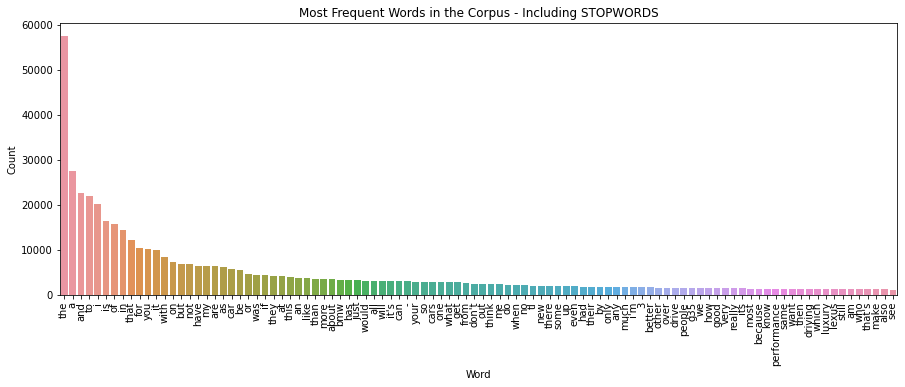

In [105]:
plot_word_frequency(corpus,100)

In [106]:
### Answer 2

In [107]:
top_10_barnds = data1.Brand.value_counts().index[:10]
top_10_barnds

Index(['toyota', 'chevrolet', 'honda', 'hyundai', 'mazda', 'suzuki', 'ford',
       'bmw', 'subaru', 'pontiac'],
      dtype='object')

In [108]:
## Count dictionary
brand_model_dict = {}
for model, brand in zip(data1.Model.values,data1.Brand.values):
    model = model.lower()
    brand_model_dict[model]=brand

In [109]:
text_data = data2.text.values

In [110]:
## Replacing the model with brand name
for i in range(len(text_data)):
    temp_data = text_data[i].lower()
    for key in brand_model_dict:
        if key in temp_data:
            temp_data = temp_data.replace(key,brand_model_dict[key])
    text_data[i] = temp_data


In [111]:
data2['text_updated'] = text_data

In [112]:
data2.head()

,Username,date,text,text_updated
0,0,"March 24, 2002 10:54PM",\ni personally think that with a few tweaks th...,\ni personally think that with a few tweaks th...
1,1,"March 25, 2002 12:06AM",\ni am debating a new purchase and these two a...,\ni am debating a new purchase and these two a...
2,2,"March 25, 2002 10:02AM","\ngreat handling, rwd, excellent engine and th...","\ngreat handling, rwd, excellent engine and th..."
3,3,"March 25, 2002 4:04PM",\nand no manual tranny. that may not matter to...,\nand no manual tranny. that may not matter to...
4,4,"March 25, 2002 5:44PM",\none beauty of bmw 3 series is that there are...,\none beauty of bmw 3 series is that there are...


In [113]:
### 3 part

In [120]:
## Calculating the lift ratio for top 10 brand without repeating
lift_dict= pd.DataFrame(index=top_10_barnds, columns=top_10_barnds)
total_shape = data2.shape[0]
for i in range(len(top_10_barnds)):
    for j in range(len(top_10_barnds)):
        brand_1 = top_10_barnds[i]
        brand_2 = top_10_barnds[j]
        count_1 = 0
        count_2 = 0
        count_3 = 0
        
        for txt in data2.text_updated.values:
            if brand_1 in txt and brand_2 in txt:
                count_3 = count_3 + 1
            elif brand_1 in txt and brand_2 not in txt:
                count_1 = count_1 + 1 
            elif brand_1 not in txt and brand_2 in txt:
                count_2 = count_2 + 1
        
        if(brand_1==brand_2):
            lift_dict[brand_1][brand_2] = np.nan

        else:
            pa = count_1/total_shape
            pb = count_2/total_shape
            pab = count_3/total_shape
            ans = (pa*pb)/pab
            
            lift_dict[brand_1][brand_2] = round(1/ans,3)

In [121]:
lift_dict

,toyota,chevrolet,honda,hyundai,mazda,suzuki,ford,bmw,subaru,pontiac
toyota,NaN,3.45,4.491,3.234,3.673,4.129,2.925,3.935,2.301,2.595
chevrolet,3.45,NaN,2.287,3.606,2.709,9.693,3.772,2.39,2.019,2.069
honda,4.491,2.287,NaN,2.866,3.765,4.306,2.896,2.816,2.206,2.255
hyundai,3.234,3.606,2.866,NaN,3.75,9.554,4.372,2.418,2.502,1.096
mazda,3.673,2.709,3.765,3.75,NaN,9.474,3.967,2.618,8.312,1.446
suzuki,4.129,9.693,4.306,9.554,9.474,NaN,5.038,3.175,7.504,4.074
ford,2.925,3.772,2.896,4.372,3.967,5.038,NaN,3.161,2.169,1.618
bmw,3.935,2.39,2.816,2.418,2.618,3.175,3.161,NaN,2.061,3.379
subaru,2.301,2.019,2.206,2.502,8.312,7.504,2.169,2.061,NaN,2.029
pontiac,2.595,2.069,2.255,1.096,1.446,4.074,1.618,3.379,2.029,NaN


In [116]:
mdslifts = lift_dict
mdslifts.reset_index(drop=True, inplace=True)
mds = MDS(random_state=0)
mdslifts = mds.fit_transform(mdslifts)
mdslifts

array([[-0.05239207, -0.12951336],
       [ 0.29582948, -0.31203823],
       [-0.17451754,  0.03506205],
       [ 0.61506785,  0.09087206],
       [ 0.26134621,  0.35716961],
       [ 0.05870275,  0.50419909],
       [ 0.34864387, -0.04210748],
       [-0.19444431, -0.38991694],
       [-0.34462829,  0.43655144],
       [-0.81360794, -0.55027826]])

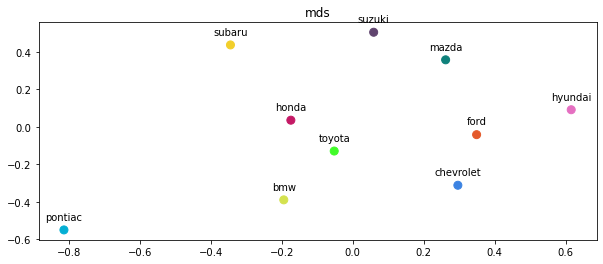

In [118]:
colors = ['#41FB29', '#3C83E2', '#C41965', '#E56FC1', '#0F817B', '#60446F', '#E45A2B', '#D4E24F', '#F2CF2B', '#04AFD4']
brands = ['toyota', 'chevrolet', 'honda', 'hyundai', 'mazda', 'suzuki', 'ford', 'bmw', 'subaru', 'pontiac']
#          toyota     chevrolet   honda     hyundai    mazda      suzuki      ford      bmw        subaru     pontiac
size = [64, 64, 64, 64, 64, 64, 64, 64, 64, 64] ##41FB29
fig = plt.figure(2, (10,4))
plt.scatter(mdslifts[:,0], mdslifts[:,1], s=size, c=colors)
count = 0
for x, y in zip(mdslifts[:,0], mdslifts[:,1]):
    label = "{0}".format(brands[count])
    count += 1
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha=('center') # horizontal alignment
    )
plt.title('mds')
plt.show()

In [ ]:
attr_lifts= pd.DataFrame(index=top_10_barnds, columns=top_10_barnds)
total_shape = data2.shape[0]
for i in range(len(top_10_barnds)):
    for j in range(len(top_10_barnds)):
        brand_1 = top_10_barnds[i]
        brand_2 = top_10_barnds[j]
        count_1 = 0
        count_2 = 0
        count_3 = 0
        
        for txt in data2.text_updated.values:
            if brand_1 in txt and brand_2 in txt:
                count_3 = count_3 + 1
            elif brand_1 in txt and brand_2 not in txt:
                count_1 = count_1 + 1 
            elif brand_1 not in txt and brand_2 in txt:
                count_2 = count_2 + 1
        
        if(brand_1==brand_2):
            ans=np.nan

        pa = count_1/total_shape
        pb = count_2/total_shape
        pab = count_3/total_shape
        ans = (pa*pb)/pab
        
        attr_lifts[brand_1][brand_2] = round(ans,3)